In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df = pd.read_csv('ULVR.L.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,4201.5,4232.5,4175.5,4232.5,4081.537598,2717881.0
1,2023-04-04,4248.5,4259.0,4222.5,4223.5,4072.858643,5825908.0
2,2023-04-05,4233.0,4288.5,4222.5,4288.5,4135.539551,3772390.0
3,2023-04-06,4278.0,4329.0,4266.5,4307.5,4153.862793,3117901.0
4,2023-04-11,4306.0,4314.5,4274.0,4297.0,4143.737305,2920574.0


In [31]:
#df=df.iloc[::-1].reset_index(drop=True)

In [32]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-03,4201.5,4232.5,4175.5,4232.5,4081.537598,2717881.0
1,2023-04-04,4248.5,4259.0,4222.5,4223.5,4072.858643,5825908.0
2,2023-04-05,4233.0,4288.5,4222.5,4288.5,4135.539551,3772390.0
3,2023-04-06,4278.0,4329.0,4266.5,4307.5,4153.862793,3117901.0
4,2023-04-11,4306.0,4314.5,4274.0,4297.0,4143.737305,2920574.0


In [33]:
#df=df.drop(['Date '], axis=1)
# df=df.drop(['series '], axis=1)
# df=df.drop(['PREV. CLOSE '], axis=1)
# df=df.drop(['ltp '], axis=1)
# df=df.drop(['vwap '], axis=1)
# df=df.drop(['VALUE '], axis=1)
# df=df.drop(['No of trades '], axis=1)

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,4201.5,4232.5,4175.5,4232.5,4081.537598,2717881.0
2023-04-04,4248.5,4259.0,4222.5,4223.5,4072.858643,5825908.0
2023-04-05,4233.0,4288.5,4222.5,4288.5,4135.539551,3772390.0
2023-04-06,4278.0,4329.0,4266.5,4307.5,4153.862793,3117901.0
2023-04-11,4306.0,4314.5,4274.0,4297.0,4143.737305,2920574.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-03 to 2024-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [36]:
def convert(dat):
    d=dat.replace(",","")
    d=float(d)
    return d

In [37]:
def convert_int(dat):
    d=dat.replace(",","")
    d=int(d)
    return d

In [38]:
# df['OPEN '] = df['OPEN '].apply(convert)
# df['HIGH '] = df['HIGH '].apply(convert)
# df['LOW '] = df['LOW '].apply(convert)
# df['close '] = df['close '].apply(convert)
# df['52W H '] = df['52W H '].apply(convert)
# df['52W L '] = df['52W L '].apply(convert)
#df['VOLUME '] = df['VOLUME '].apply(convert_int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-03 to 2024-04-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,4006.988000,4031.450709,3981.421640,4004.678000,3931.945477,4.688923e+06
std,173.788635,172.944070,173.640076,172.981925,137.416176,2.386460e+06
min,3694.500000,3723.000000,3680.500000,3694.000000,3660.772705,9.394910e+05
25%,3874.000000,3895.625000,3847.250000,3862.625000,3828.401001,3.083393e+06
50%,3997.500000,4023.500000,3976.250000,3995.250000,3924.128907,4.214757e+06
75%,4088.500000,4106.855591,4062.250000,4082.375000,4001.500000,5.493132e+06
max,4475.000000,4483.250000,4433.000000,4443.500000,4285.011719,1.459145e+07


In [41]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [42]:
df['Next_Day_Close'] = df['Close'].shift(-1)

In [43]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Next_Day_Close
Date,,,,,,,
2024-03-25,3963.5,3980.0,3954.999023,3957.5,3957.5,3301289.0,3966.0
2024-03-26,3934.5,3976.5,3926.500000,3966.0,3966.0,6152546.0,3962.0
2024-03-27,3949.0,3973.0,3931.500000,3962.0,3962.0,5847297.0,3975.5
2024-03-28,3974.5,3982.5,3956.000000,3975.5,3975.5,3456269.0,3935.0
2024-04-02,3976.0,3979.0,3930.499023,3935.0,3935.0,4329133.0,NaN


In [44]:
df.shape

(251, 7)

In [46]:
#df.drop([df.shape[0]-1], axis=0, inplace=True)
df = df.drop(index="2024-04-02")

In [47]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Next_Day_Close
Date,,,,,,,
2024-03-22,3931.0,3993.0,3923.000000,3976.5,3976.5,11423811.0,3957.5
2024-03-25,3963.5,3980.0,3954.999023,3957.5,3957.5,3301289.0,3966.0
2024-03-26,3934.5,3976.5,3926.500000,3966.0,3966.0,6152546.0,3962.0
2024-03-27,3949.0,3973.0,3931.500000,3962.0,3962.0,5847297.0,3975.5
2024-03-28,3974.5,3982.5,3956.000000,3975.5,3975.5,3456269.0,3935.0


In [48]:
train_data=df[0:int(len(df) * 0.8)]
test_data=df[int(len(df) * 0.8):]
train_ar = train_data['Next_Day_Close'].values
test_ar = test_data['Next_Day_Close'].values

In [49]:
X_train=train_data.drop(['Next_Day_Close'], axis=1)
X_test=test_data.drop(['Next_Day_Close'], axis=1)


In [50]:
X_train=np.expand_dims(X_train,axis=1)

In [51]:
X_test=np.expand_dims(X_test,axis=1)

In [52]:
y_train=train_data['Next_Day_Close']
y_test=test_data['Next_Day_Close']

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [54]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (1,X_train.shape[2],)))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(1,activation="linear"))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 50)             11400     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,651
Trainable params: 31,651
Non-trainable params: 0
_________________________________________________________________


In [55]:
filepath = 'model_ULVR.keras'
checkpoint = ModelCheckpoint(filepath=filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
ES = EarlyStopping(monitor='loss', patience=100)

In [56]:
history=model.fit(X_train, y_train, epochs=10000,validation_data=[X_test,y_test], callbacks = [checkpoint,ES])

Epoch 1/10000
1/7 [===>..........................] - ETA: 21s - loss: nan - mean_absolute_error: nan
Epoch 1: loss did not improve from inf
7/7 [==============================] - 5s 177ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 2: loss did not improve from inf
7/7 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 3: loss did not improve from inf
7/7 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 4: loss did not improve from inf
7/7 [=========================

Epoch 31/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 31: loss did not improve from inf
7/7 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 32/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 32: loss did not improve from inf
7/7 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 33/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 33: loss did not improve from inf
7/7 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 34/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 34: loss did not improve from inf
7/7 [====================

7/7 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 61/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 61: loss did not improve from inf
7/7 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 62/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 62: loss did not improve from inf
7/7 [==============================] - 0s 6ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 63/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 63: loss did not improve from inf
7/7 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 64/10000
1/7 [===>.....

Epoch 90/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 90: loss did not improve from inf
7/7 [==============================] - 0s 8ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 91/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 91: loss did not improve from inf
7/7 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 92/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 92: loss did not improve from inf
7/7 [==============================] - 0s 7ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 93/10000
1/7 [===>..........................] - ETA: 0s - loss: nan - mean_absolute_error: nan
Epoch 93: loss did not improve from inf
7/7 [====================

In [57]:
import matplotlib.pyplot as plt

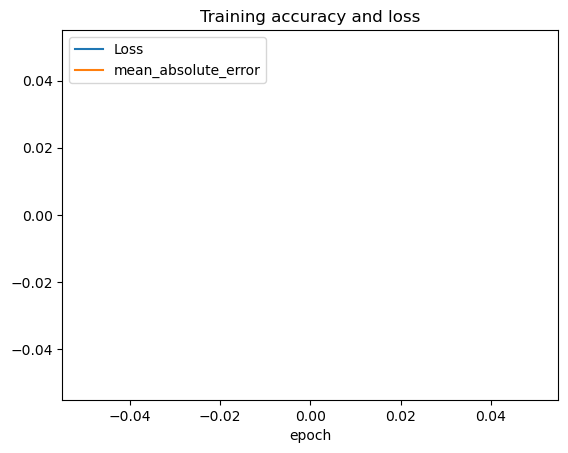

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.title('Training accuracy and loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'mean_absolute_error'], loc='upper left')
plt.show()